In [79]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from topostats.io import LoadScans
import typing

import perovskite_flattening as perov_flatten

from topostats.plottingfuncs import Colormap
colourmap = Colormap()
CMAP = colourmap.get_cmap()
CMAP = plt.get_cmap("viridis")

In [10]:
DATA_DIR = Path('/Users/sylvi/topo_data/textured-silicon/Peak Force QNM/')
OUTPUT_DIR = Path('/Users/sylvi/topo_data/textured-silicon/flattening_output/')
OUTPUT_DIR.mkdir(exist_ok=True)
directory_contents = DATA_DIR.iterdir()
for item in directory_contents:
    print(item)
FILE_EXT = '.spm'
CHANNEL = "Height"

/Users/sylvi/topo_data/textured-silicon/Peak Force QNM/pfqnm_C60_mod_perov_Si_20um.0_00002.spm
/Users/sylvi/topo_data/textured-silicon/Peak Force QNM/pfqnm_C60_ref_perov_Si_3um.spm
/Users/sylvi/topo_data/textured-silicon/Peak Force QNM/pfqnm_C60_mod_perov_Si_10um.0_00001.spm
/Users/sylvi/topo_data/textured-silicon/Peak Force QNM/pfqnm_C60_ref_perov_Si__10um.0_00001.spm
/Users/sylvi/topo_data/textured-silicon/Peak Force QNM/pfqnm_ref_perov_Si_5um.0_00023.spm
/Users/sylvi/topo_data/textured-silicon/Peak Force QNM/pfqnm_C60_ref_perov_Si__10um.0_00002.spm
/Users/sylvi/topo_data/textured-silicon/Peak Force QNM/pfqnm_C60_ref_perov_Si_5um.0_00000.spm
/Users/sylvi/topo_data/textured-silicon/Peak Force QNM/pfqnm_mod_perov_Si_3um.0_00004.spm
/Users/sylvi/topo_data/textured-silicon/Peak Force QNM/pfqnm_C60_mod_perov_Si_5um.0_00000.spm
/Users/sylvi/topo_data/textured-silicon/Peak Force QNM/pfqnm_mod_perov_Si_10um.0_00006.spm
/Users/sylvi/topo_data/textured-silicon/Peak Force QNM/pfqnm_ref_perov_Si

In [5]:
def plot(image: np.ndarray):
    plt.imshow(image, cmap=CMAP)
    plt.show()

In [70]:
def load_data(file: Path, channel=CHANNEL):
    loadscans = LoadScans([file], channel=channel)
    loadscans.get_data()
    image = loadscans.image
    pixel_to_nm_scaling = loadscans.pixel_to_nm_scaling
    return image, pixel_to_nm_scaling

def plot_gallery(images: list[np.ndarray], filenames: list[str], row_length: int = 4, title:str = "", save_figure:bool =False):
    print(f"plotting {len(images)} images")
    fig, ax = plt.subplots(int(np.ceil(len(images) / row_length)), row_length, figsize=(15, 15))
    for image_index, image in enumerate(images):
        image_index_y = int(np.floor(image_index / row_length))
        image_index_x = image_index % row_length
        print(f"image index: {image_index}")
        print(f"image index x: {image_index_x}")
        print(f"image index y: {image_index_y}")
        ax[image_index_y, image_index_x].imshow(image, cmap=CMAP)
        ax[image_index_y, image_index_x].set_title(filenames[image_index], fontsize=10)
        
    plt.suptitle(title)
    fig.tight_layout()
    plt.show()
    if save_figure:
        if title != "":
            fig.savefig(OUTPUT_DIR / title)
        else:
            print("FIGURE NOT SAVED, TITLE MISSING")

/Users/sylvi/topo_data/textured-silicon/Peak Force QNM/pfqnm_C60_mod_perov_Si_20um.0_00002.spm
[Mon, 17 Jul 2023 13:18:59] [INFO    ] [topostats] Extracting image from /Users/sylvi/topo_data/textured-silicon/Peak Force QNM/pfqnm_C60_mod_perov_Si_20um.0_00002.spm
[Mon, 17 Jul 2023 13:18:59] [INFO    ] [topostats] Loading image from : /Users/sylvi/topo_data/textured-silicon/Peak Force QNM/pfqnm_C60_mod_perov_Si_20um.0_00002.spm
[Mon, 17 Jul 2023 13:18:59] [INFO    ] [topostats] [pfqnm_C60_mod_perov_Si_20um.0_00002] : Loaded image from : /Users/sylvi/topo_data/textured-silicon/Peak Force QNM/pfqnm_C60_mod_perov_Si_20um.0_00002.spm
[Mon, 17 Jul 2023 13:18:59] [INFO    ] [topostats] [pfqnm_C60_mod_perov_Si_20um.0_00002] : Extracted channel Height
[Mon, 17 Jul 2023 13:18:59] [INFO    ] [topostats] [pfqnm_C60_mod_perov_Si_20um.0_00002] : Pixel to nm scaling : 39.0625
/Users/sylvi/topo_data/textured-silicon/Peak Force QNM/pfqnm_C60_ref_perov_Si_3um.spm
[Mon, 17 Jul 2023 13:18:59] [INFO    ] [t

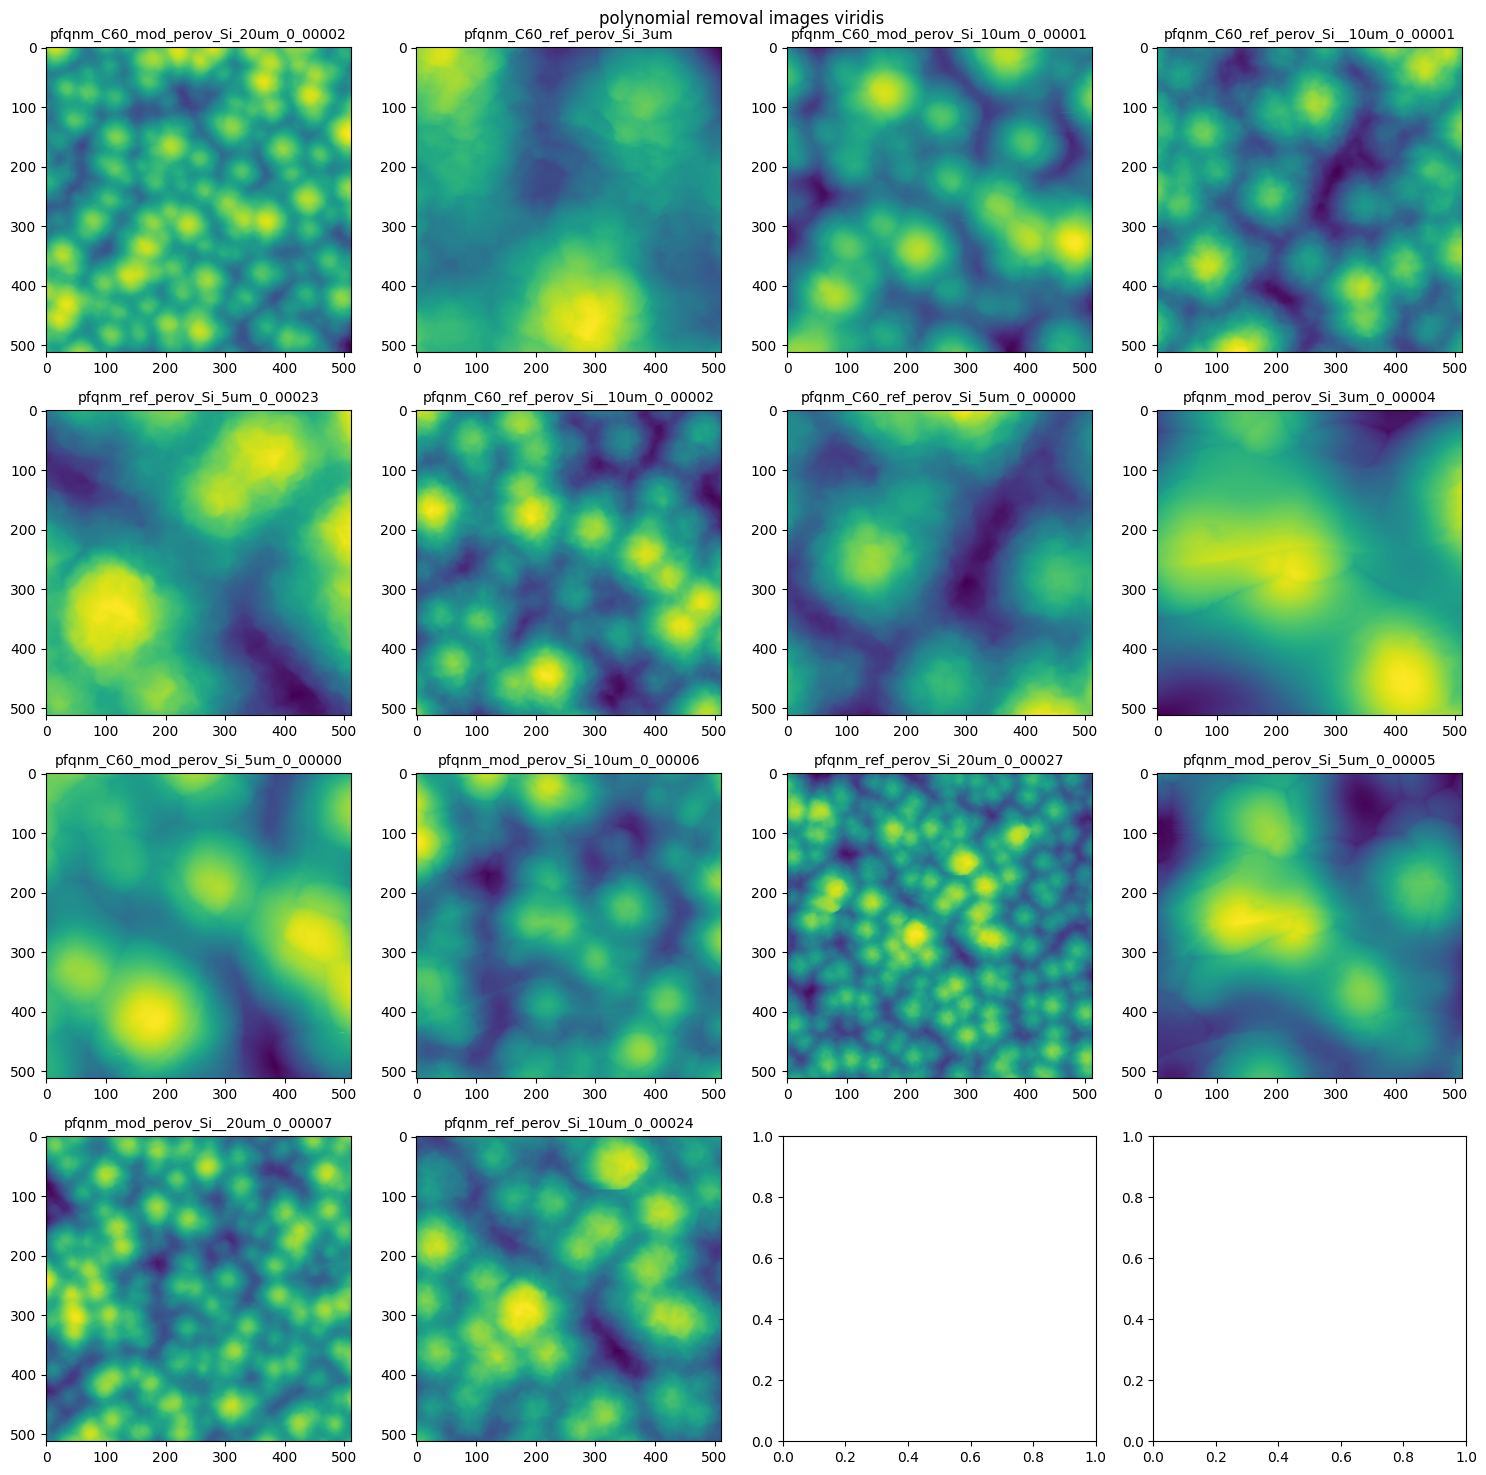

In [80]:
files = DATA_DIR.glob(f"*{FILE_EXT}")
save_images = False
plot_individual_images = False
images = []
filenames = []
for file in files:
    filename = str(file.stem).replace('.', '_')
    print(file)
    image, pixel_to_nm_scaling = load_data(file)
    if plot_individual_images:
        plot(image)

    # Flattening
    # image = perov_flatten.plane_tilt_removal(image)
    
    images.append(image)
    filenames.append(filename)
    if save_images:
        plt.imsave(OUTPUT_DIR / f"{filename}.png", image, cmap=CMAP)

plot_gallery(images, filenames=filenames, title="polynomial removal images viridis", save_figure=True)